# Handwriting Recognition using K-Means

The [U.S. Postal Service](https://www.govexec.com/federal-news/1999/02/postal-service-tests-handwriting-recognition-system/1746/) has been using machine learning and scanning technologies since 1999. Because its postal offices have to look at roughly half a billion pieces of mail every day, they have done extensive research and developed very efficient algorithms for reading and understanding addresses. And not only the post office:
- ATMs can recognize handwritten bank checks
- Evernote can recognize handwritten task lists
- Expensify can recognize handwritten receipts
- But how do they do it?  

In this project, you will be using **K-means clustering** (the algorithm behind this magic) and scikit-learn to cluster images of handwritten digits.

In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans

##  1.

- The `sklearn` library comes with a digits dataset for practice.
    ```python	
    import numpy as np
    from matplotlib import pyplot as plt
    ```	
- From `sklearn` library, import the `datasets` module.
- Then, load in the `digits` data using `.load_digits()` and print `digits`.

In [10]:
digits = load_digits()
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64)), 'target': array([0, 1, 2, ..., 8, 9, 8], shape=(1797,)), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_

##  2.

- When first starting out with a dataset, it’s always a good idea to go through the data description and see what you can already learn.
- Instead of printing the `digits`, print `digits.DESCR`.
    - What is the size of an image (in pixel)?
   -  Where is this dataset from?

In [9]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

##  3.

- Let’s see what the data looks like!
- Print `digits.data`.

In [11]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


##  4.

- Next, print out the target values in `digits.target`.

In [12]:
print(digits.target)

[0 1 2 ... 8 9 8]


##  5.

- To visualize the data images, we need to use Matplotlib. 
- Let’s visualize the image at index `100`:
    ```python
    plt.gray() 

    plt.matshow(digits.images[100])

    plt.show()
    ```

4


<Figure size 640x480 with 0 Axes>

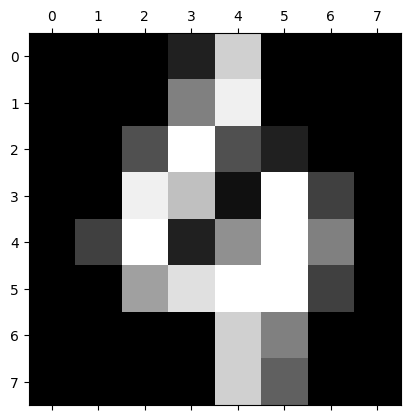

In [15]:
print(digits.target[100])
plt.gray() 
plt.matshow(digits.images[100])
plt.show()

##  6.

- Now we understand what we are working with. 
- Let’s cluster the 1797 different digit images into groups.
- Import `KMeans` from `sklearn.cluster`.

##  7.

- What should be the `k`, the number of clusters, here?
- Use the `KMeans()` method to build a model that finds `k` clusters

In [17]:
model = KMeans(n_clusters=10, random_state=42)

##  8.

- Use the `.fit()` method to fit the `digits.data` to the model.

In [18]:
model.fit(digits.data)

KMeans(n_clusters=10, random_state=42)

##  9. / 10. / 11.

**Task 9**
- Let’s visualize all the centroids! 
- Because data samples live in a 64-dimensional space, the centroids have values so they can be images!
- First, add a figure of size 8x3 using `.figure()`.
- Then, add a title using `.suptitle()`.

<br>

**Task 10**
- Scikit-learn sometimes calls centroids “cluster centers”.
- Write a `for` loop to displays each of the `cluster_centers_` like so:
    ```python
    for i in range(10):

    # Initialize subplots in a grid of 2X5, at i+1th position
    ax = fig.add_subplot(2, 5, 1 + i)

    # Display images
    ax.imshow(model.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)
    ```	
- The cluster centers should be a list with 64 values (0-16). 
- Here, we are making each of the cluster centers into an 8x8 2D array.

<br>

**Task 11**
- Outside of the `for` loop, use `.show()` to display the visualization.
- These are the centroids of handwriting from thirty different people collected by Bogazici University (Istanbul, Turkey):
    - Index `0` looks like 0
    - Index `1` looks like 9
    - Index `2` looks like 2
    - Index `3` looks like 1
    - Index `4` looks like 6
    - Index `5` looks like 8
    - Index `6` looks like 4
    - Index `7` looks like 5
    - Index `8` looks like 7
    - Index `9` looks like 3
- Notice how the centroids that look like 1 and 8 look very similar and 1 and 4 also look very similar.

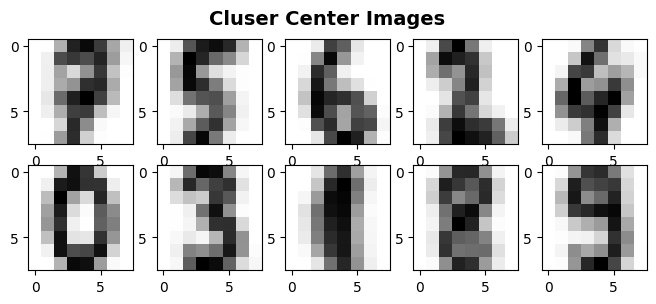

In [ ]:
# Task 9
fig = plt.figure(figsize=(8, 3))
fig.suptitle('Cluser Center Images', fontsize=14, fontweight='bold')

# Task 10
for i in range(10):
    # Initialize subplots in a grid of 2X5, at i+1th position
    ax = fig.add_subplot(2, 5, 1 + i)
    
    # Display images
    ax.imshow(model.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)

# Task 11
plt.show()

##  12.

- If you want to see another example that visualizes the data clusters and their centers using K-means, check out the sklearn‘s [own example](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html).  
    <img src="Images/sklearn-clustering-example.webp" alt="K-means clustering of digits" width="500"/>
- You will get a different K-means clustering map each time you run a new K-means model.

##  13.

- Create a new variable named `new_samples` and fill it with values.

In [25]:
new_samples = np.array([
    [0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.49,0.80,0.18,0.00,0.00,0.00,0.00,1.36,1.91,1.77,0.98,0.00,0.00,0.00,0.00,0.42,0.31,1.54,1.00,0.00,0.00,0.00,0.00,0.46,2.02,1.18,0.06,0.00,0.00,0.00,0.00,0.86,1.65,0.38,0.00,0.00,0.00,0.00,0.00,0.13,1.25,1.94,2.15,0.73,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
    [0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.40,0.63,0.31,0.00,0.00,0.00,0.00,0.74,1.96,1.84,1.72,0.15,0.00,0.00,0.36,2.00,0.38,0.36,1.82,0.42,0.00,0.00,1.55,0.88,0.00,0.15,1.98,0.25,0.00,0.00,1.68,1.14,0.89,1.71,1.16,0.00,0.00,0.00,0.35,1.17,1.29,0.87,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
    [0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.29,1.24,0.98,0.00,0.00,0.00,0.00,0.00,0.45,1.01,1.91,0.31,0.00,0.00,0.00,0.00,0.36,1.49,2.01,0.27,0.00,0.00,0.00,0.00,1.07,1.62,0.15,0.10,0.00,0.00,0.00,0.00,0.32,1.63,2.04,2.07,0.34,0.00,0.00,0.00,0.00,0.00,0.12,0.19,0.00,0.00],
    [0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.15,1.22,0.73,0.09,0.00,0.00,0.00,0.75,1.89,2.00,1.96,1.88,0.42,0.00,0.47,1.96,0.45,0.00,0.00,1.30,1.05,0.00,1.08,0.95,0.00,0.00,0.06,1.83,0.49,0.00,0.91,1.73,0.68,0.46,1.50,1.40,0.00,0.00,0.00,0.77,1.54,1.89,1.23,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00]
])

##  14.

- Use the `.predict()` function to predict new labels for these four new digits. 
- Store those predictions in a variable named `new_labels`.

In [28]:
new_labels = model.predict(new_samples)

##  15.

- But wait, because this is a clustering algorithm, we don’t know which label is which.
- By looking at the cluster centers, let’s map out each of the labels with the digits we think it represents:
    ```python	
    for i in range(len(new_labels)):
    if new_labels[i] == 0:
        print(0, end='')
    elif new_labels[i] == 1:
        print(9, end='')
    elif new_labels[i] == 2:
        print(2, end='')
    elif new_labels[i] == 3:
        print(1, end='')
    elif new_labels[i] == 4:
        print(6, end='')
    elif new_labels[i] == 5:
        print(8, end='')
    elif new_labels[i] == 6:
        print(4, end='')
    elif new_labels[i] == 7:
        print(5, end='')
    elif new_labels[i] == 8:
        print(7, end='')
    elif new_labels[i] == 9:
        print(3, end='')
    ```

In [36]:
for i in range(len(new_labels)):
    if new_labels[i] == 0:
        print(7, end='')
    elif new_labels[i] == 1:
        print(5, end='')
    elif new_labels[i] == 2:
        print(6, end='')
    elif new_labels[i] == 3:
        print(2, end='')
    elif new_labels[i] == 4:
        print(4, end='')
    elif new_labels[i] == 5:
        print(0, end='')
    elif new_labels[i] == 6:
        print(3, end='')
    elif new_labels[i] == 7:
        print(1, end='')
    elif new_labels[i] == 8:
        print(8, end='')
    elif new_labels[i] == 9:
        print(9, end='')

9979